<hr style="height:2px;border:none"/>
<h1 align='center'> <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />

INF-395 / 477 / 577 Tarea 1 Redes Neuronales Artificiales - 2020-1 </h1>

<H3 align='center'> Integrantes: Paula Nieto - Gabriela Sepúlveda </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en tensorflow, keras, pandas y numpy
* Redes Densas Feed Forward
* Regularización y Dropout
* Exploding & Vanishing Gradient
* Skip Connections
* Learn Rate Decay
* Optimizadores
* Redes Convolucionales
* Image Data Augmentation
* Interpretabilidad CNNs


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos). Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno para toda la tarea, con tal de que todos los entregables estén bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_ ( en caso de ser repositorio privado, invitar como colaborador al usuario de github "Aerlio") al correo electrónico del ayudante (*<tomas.ochoa.14@sansano.usm.cl>*), en copia al profesor (*<cvalle@inf.utfsm.cl>*). Especificar el siguiente asunto: [INF395/477/577-2020 Tarea1]
* Fecha de entrega y presentaciones: 13 de Noviembre. Hora límite de entrega: 23:00. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail. 

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

[1.](#primero) Conceptos básicos de redes neuronales  <br>
[2.](#segundo) Reconocimiento de lenguaje de señas <br>
[3.](#tercero) Interpretabilidad de CNNs, transfer learning, y skip connections <br>

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo solo son guías y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con comentarios y con celdas _Markdown_ con los comentarios de la pregunta y con cualquier analisis, fórmula o explicación que les parezca relevante para justificar sus procedimientos. 
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará mucho la elección en si, en cambio la argumentación detrás de la elección será lo más ponderado.

**Es ÁLTAMENTE recomendado realizar esta tarea en _Colab_ de Google (https://colab.research.google.com/notebooks/intro.ipynb#recent=true), con el fin de no depender del rendimiento de su computador personal al momento de entrenar redes neuronales y poder compartir de forma fácil sus avances con su compañer@ de trabajo.** Si bien conlleva sus pros y contras utilizar _Colab_ , existirá una curva de aprendizaje personal que lo ayudará a sacar el mayor provecho a esta herramienta, por ejemplo aprendiendo a guardar los avances realizados, evitando tener que ejecutar todo el código cada vez que se abra _Colab_ . *Tip: Una vez abierto un notebook en _Colab_ ir a **entorno de ejecución**->**Cambiar tipo de entorno de ejecución**, y seleccionár TPU como acelerador por hardware para redes feedforward y GPU para redes convolucionales.*.

# 2. Reconocimiento de lenguaje de señas

Una de las áreas donde las redes neuronales han obtenido desempeños decisivamente superiores al resto de los métodos existentes, al menos en su momento, es en el reconocimiento de imágenes. La capacidad de las redes convolucionales de aprender y extraer patrones sobre patrones hasta obtener características de alto nivel, representativas de atributos de las imágenes, ha permitido desempeños superiores a los obtenidos por otros métodos de aprendizaje automático o inteligencia aritificial, e incluso en algunos casos al desempeño humano.

Una de las tareas usuales que se pueden resolver con redes neuronales convolucionales es la clasificación de imágenes. Para este punto nos basaremos en un dataset de lenguaje de señas, su descripción detallada se puede encontrar en https://www.kaggle.com/datamunge/sign-language-mnist (No es necesario descargar directamente el dataset si está usando _Colab_ como es sugerido)

<h1 align='center'> <img src="https://i1.wp.com/25.media.tumblr.com/tumblr_mdcs1cF4nn1ri2o31o1_1280.png" width="100%" height="30%" /> </h1>


Note que el entrenamiento de redes convolucionales se beneficia particularmente del uso de unidades de procesamiento gráfico, por lo cual podría ser recomendable utilizarlas en caso de disponer, o considerar correr los codigos completos una vez verificado su funcionamiento en una sesión de Collab acelerada por GPU, entre otras opciones de GPU en la nube existentes.

## 2.a Carga de datos y visualizaciones

##### I) Iniciaremos cargando los datos. Para esto necesitará crear una cuenta en kaggle, dirigirse a su perfil, ir a Account, y en la sección API apretar _Create new API token_ , se descargará un archivo kaggle.json, ábralo como archivo de texto y obtenga su username y key. Luego ejecute el siguiente código (desconozco por qué pero a veces hay que ejecutar el código 2 veces para que funcione). Solución obtenida desde el hilo: https://gist.github.com/jayspeidell/d10b84b8d3da52df723beacc5b15cb27

In [ ]:
username="pau503"
key="743f202cd338437b1e0026b419ac3f08"
!pip install -q kaggle
api_token = {"username":username,"key":key}
import json
import zipfile
import os
os.environ['KAGGLE_USERNAME'] = str(username)
os.environ['KAGGLE_KEY'] = str(key)
!kaggle datasets download -d datamunge/sign-language-mnist
if not os.path.exists("/content/competitions/data_sign"):
    os.makedirs("/content/competitions/data_sign")
os.chdir('/content/competitions/data_sign')
for file in os.listdir():
    if file[-4:]==".zip":
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()
!ls

 89% 56.0M/62.6M [00:00<00:00, 264MB/s]
100% 62.6M/62.6M [00:00<00:00, 248MB/s]
american_sign_language.PNG  sign-language-mnist.zip  sign_mnist_train
amer_sign2.png		    sign_mnist_test	     sign_mnist_train.csv
amer_sign3.png		    sign_mnist_test.csv


Si en el siguiente código obtiene error de directorio ejecutar de nuevo celda superior

In [ ]:
import pandas as pd
import numpy as np
df_tr=pd.read_csv("sign_mnist_train.csv")
X_tmp=df_tr.values[:,1:].reshape(-1,28,28,1)
Y_tmp=df_tr.values[:,:1]
df_tst=pd.read_csv("sign_mnist_test.csv")
X_tst=df_tst.values[:,1:].reshape(-1,28,28,1)
Y_tst=df_tst.values[:,:1]

Para evitar largos tiempos de entrenamiento y hacer más desafiante el problema, sacrificaremos data de entrenamiento. **Ejectuar el siguiente código**. Mantendremos el tamaño del conjunto de test.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
sf=StratifiedShuffleSplit(n_splits=1, test_size=2000, random_state=0)
for smaller_index,data_index in sf.split(X_tmp, Y_tmp): # en realidad este método está pensado para hacer cross-validation con clases balanceadas,
                                                                        # ahora lo ocupamos solamente para extraer 1200 observaciones manteniendo la proporción de clases
                                                                          # del dataset original
    x_tmp=X_tmp[data_index]
    y_tmp=Y_tmp[data_index]

##### II) **Visualice** algunas imágenes de cada una de las catégorias junto con sus nombres. 

**Preguntas:** ¿Qué pares de categorías cree podrían ocasionar problemas al momento de clasificación? ¿Por qué hay letras omitidas (inferir viendo abecedario de lenguaje de señas americano)? ¿Las categorías están balanceada? ¿Cuántos canales están disponibles?

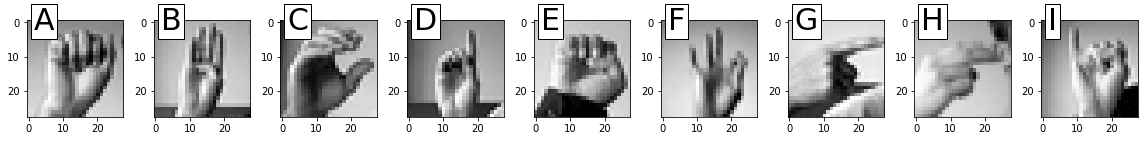

[82. 74. 83. 87. 70. 88. 79. 74. 85.  0. 81. 90. 77. 84. 87. 79. 93. 94.
 87. 86. 85. 79. 89. 85. 82.  0.]


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[16,4]
letters=["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]
fig, axs = plt.subplots(1,9)
for i,ax in enumerate(axs):
  ax.imshow(x_tmp[np.where(y_tmp[:,0]==i)[0][0],:,:,0], cmap = "gray")  
  ax.text(1.5, 2.2, letters[i], bbox={'facecolor': 'white', 'pad': 3},fontsize=30)
plt.tight_layout()
plt.show()

counter = np.zeros(26)
for categoria in y_tmp:
      counter[categoria] += 1
print(counter)

**Respuestas**

Los pares que podrían ocasionar problemas son: A-S, M-N, G-H, C-O, P-K, E-M.

Una de las razones por las que se eliminan algunas letras es porque requieren movimiento, y esto no se puede realizar con una sola imagen. Además, se eliminan letras que existen en el español porque el lengua de señas depende del sistema adoptado en cada país.  

Las categorías están balanceadas ya que la que menos se presenta aparece 70 veces (letra E), y la que más se presenta aparece 94 veces (letra R), por lo que la diferencia no es grande. Sin embargo, la letra E tiene más probabilidades de ser confundida con otras letras como A, S, M y N, es por esto que sería mejor tener más muestras de esta letra que de R.

Se ocupa un solo canal, que está en la escala del gris, es decir, va desde 0-255.

## 2.b Preprocesamiento

Conforme el conjunto en entrenamiento y validacion a partir de x_tmp e y_tmp con proporciones de 80% y 20% respectivamente, preocúpese de que los conjuntos de entrenamiento y validación mantengan la proporción (aprox.) para cada clase (mantener equilibrio de clases), inspírese en el código utilizado para reducir la cantidad de datos (sección 2.a). Transforme la escala de las imágenes, de $[0,255]$ a $[-1,1]$. Utilice la función `get_dummies` de pandas para transformar $y$ a _encodding_ _one hot vector_. 

**Preguntas:**
¿Perdemos información con este preprocesamiento? ¿Qué representa cada uno de los valores de la tupla `x_tr.shape`? 

¿Podemos considerar los valores de $y$ como valores numéricos o debemos transformarlos de alguna forma? ¿Por qué? 

¿Cómo se transforma el `.shape` de $y$?

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit # <- suggestion
from keras.utils.np_utils import to_categorical

sf=StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
for train_index, val_index in sf.split(x_tmp, y_tmp):
  x_tr, x_val = x_tmp[train_index], x_tmp[val_index]
  y_tr, y_val = y_tmp[train_index], y_tmp[val_index]

#Verificación
counter_tr, counter_val = np.zeros(26), np.zeros(26)
for letra_tr in y_tr:
      counter_tr[letra_tr] += 1
print("Proporción del conjunto de entrenamiento ", counter_tr)
for letra_val in y_val:
      counter_val[letra_val] += 1
print("Proporción del conjunto de validación ", counter_val)

# Transforma la escala de las imágenes
x_tr = x_tr/127.5 - 1 
x_val = x_val/127.5 -1
x_tst = X_tst/127.5 - 1

print("Shape de x_tr: ", x_tr.shape)

print("Shape de y previo: ", y_tr.shape)
y_tr = pd.get_dummies(y_tr[:,0],len(letters)).values
y_val = pd.get_dummies(y_val[:,0],len(letters)).values
y_tst = pd.get_dummies(Y_tst[:,0], len(letters)).values
print("Shape de y posterior: ",y_tr.shape)

Proporción del conjunto de entrenamiento  [66. 59. 66. 70. 56. 70. 63. 59. 68.  0. 65. 72. 62. 67. 70. 63. 74. 75.
 70. 69. 68. 63. 71. 68. 66.  0.]
Proporción del conjunto de validación  [16. 15. 17. 17. 14. 18. 16. 15. 17.  0. 16. 18. 15. 17. 17. 16. 19. 19.
 17. 17. 17. 16. 18. 17. 16.  0.]
Shape de x_tr:  (1600, 28, 28, 1)
Shape de y previo:  (1600, 1)
Shape de y posterior:  (1600, 24)


**Respuestas**

Si perdemos información para entrenar la red neuronal, esto pasa siempre que se utiliza un porcentaje de la data para hacer validación. Pero en general, no se pierde información de cada letra porque la proporción se mantiene, es decir, no hay ninguna letra que no sea representada en los datos.

Los valores de la tupla x_tr.shape son (1600, 28, 28, 1), donde 1600 son las muestras del conjunto de datos de entrenamiento, el primer 28 son las posiciones de pixeles en el eje , el segundo 28 son las posiciones de pixeles en el eje , y 1 es el color de la escala de la imágenes que luego de la transformación va de [-1, 1].

Es necesario transformar y a un one-hot vector, ya que su representación permite que el algoritmo aproveche la información contenida en un valor de la categoría sin la confusión causada por la ordinalidad de los números, es decir, es más simple representar una letra al activar una neurona con un 1, que representar el número en sí.  

El .shape de y se transforma de (1600, 1) a (1600, 24), lo que cambió fue que antes la letra se indicaba en una escala de 0 a 23, donde 0 es la letra A y 24 es la letra Y. Luego de la transformación, se vuelve un vector de largo 24 donde la letra se indica con un uno, es decir la letra A ahora es [1, 0, ..., 0], es decir, un one hot vector. 


## 2.c Primera red Convolucional

Entrenaremos una primera red convolucional sobre los datos, con la mayoría de los parámetros por defecto. Cree primero la red siguiendo la estructura $C\times P\times C\times P \times D$ donde $C$ representa una capa convolucional, $P$ una capa de _Max pooling_ y $D$ una capa densa. Note que antes de la capa densa debe agregar una capa _Flatten_ que transforma los filtros a vectores que luego pueden ser utilizados por la capa densa. 

Para los parámetros de las capas, fijaremos ambas capas convolucionales con 128 filtros de $3\times 3$, stride por default, y _padding 'same'_ (es decir agregaremos 0 a los bordes de la imágen de tal manera que se preserve la dimiensión de la imágen al atravesar la capa; y las capas de _pooling_ tendrán tamaño y _stride_ $2\times 2$, como muestra el código. **Note que a diferencia de la pregunta 1 aprovecharemos al máximo el lenguaje high-level keras.**

Utilice el método `.summary` del modelo para ver la cantidad de parámetros y las dimensiones de los outputs de cada capa (note que cómo en la primera capa especificamos el `input_shape` podemos llamar el método antes de compilar el modelo o de pasarle datos. **Justifique** el número parámetros y el _Output Shape_ de cada capa en función de la estructura de la red y lo aprendido en clases. 

**Preguntas:**

¿Por qué la capa de salida debe tener 24 neuronas? ¿Qué operación efectúa la activación _SoftMax_? ¿Qué representaría en terminos del problema el vector de salida de la red?

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

#Primera capa C x P
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Segunda capa C x P 
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Capa flatten y D
model.add(Flatten())    
model.add(Dense(units=24, activation='softmax')) # output

    
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 24)                150552    
Total params: 299,416
Trainable params: 299,416
Non-trainable params: 0
__________________________________________________

**Respuestas** 

La capa de salida debe tener todas las categorías posibles (abecedario americano sin J, ni Z) ya que al ser una clasificación no binaria, si por ejemplo se utiliza una imagen de entrada que representa la letra A, y ésta no es incluida en la salida, lo va a representar como cualquier otra letra parecida. 

La activación SoftMax realiza una normalización, ya que antes de la última capa, la suma de las probabilidades no dará uno, por lo que es necesario normalizar para escoger la probabilidad más alta.

En términos del problema, el vector de salida representa la letra con más probabilidad de ser la imagen de entrada, es decir, la clasificación de la categoría.

## 2.d Primer entrenamiento

##### I) Compile la red definida en el item anterior. Para esta pregunta puede usar los optimizadores configurados por defecto, y debe usar como _loss_ _Categorical Crossentropy_.

Entrene la red hasta observar convergencia recuperando su `history`. Grafique como varia el _accuracy_ en entrenamiento y validación a lo largo del aprendizaje. Adicionalmente calcule el accuracy para todo el conjunto de test. Mida igualmente el _categorical accuracy_ como se muestra en el código.  

**Preguntas:**

¿Por qué preferimos medir _crossentropy_ y no por ejemplo _MSE_ en este problema? ¿Qué valor representa el _accuracy_? ¿Le parece buena medida de desempeño para este problema? ¿Por qué luego de lograr un accuracy de 100% en el conj. de entrenamiento siguen actualizándose los pesos de la red? ¿A qué corresponde cada valor de la lista que retorna model.evaluate?

**Recordar usar entorno GPU en _Colab_**

In [ ]:
from keras.callbacks import History, EarlyStopping

my_callbacks = [History(), # Returns validation and training loss
    EarlyStopping(patience=100,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs,keep it at 100 it's only to show u
                                     restore_best_weights=True)]

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
# Entrenamiento de la red. 
history = model.fit(x_tr, y_tr, epochs=20, validation_data=(x_val,y_val),verbose=0,callbacks=my_callbacks)

In [ ]:
acc_tst = model.evaluate(x_tst, y_tst, verbose=0)
print("Accuracy en el conjunto de test: ", acc_tst[1])

Accuracy en el conjunto de test:  0.8839933276176453


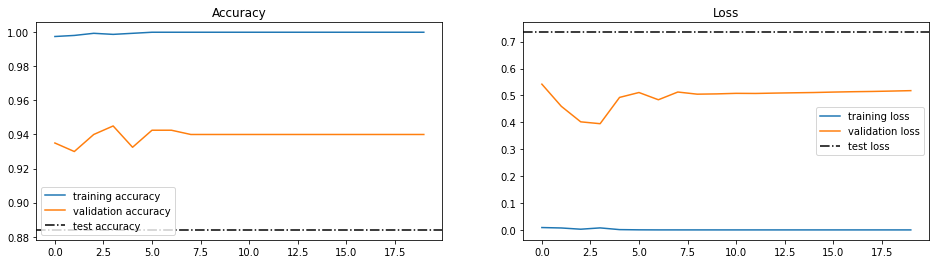

In [ ]:
#Gráficos 
plt.subplot(1,2,1)
plt.title("Accuracy")
plt.plot(history.history["acc"],label="training accuracy")
plt.plot(history.history["val_acc"],label="validation accuracy")
plt.axhline(y=acc_tst[1],color="k",linestyle="-.",label="test accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.title("Loss")
plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.axhline(y=acc_tst[0],color="k",linestyle="-.",label="test loss")
plt.legend()

plt.show()

**Respuestas**

Es preferible medir crossentropy porque estamos enfrentando un problema de clasificación, ya que buscamos la letra que la imagen representa, es por esto que no se puede usar MSE, ya que al ser una función de perdida de regresión, lo que se predice es un valor cuantitativo, y no una etiqueta. 

El accuracy representa la exactitud con la que el modelo predice, es decir, la frecuencia con la que el modelo hace una predicción correcta. Es una probabilidad por lo que su máximo valor es 1, que significa que el modelo predice perfectamente.

Es una buena medida de desempeño, ya que si el accuracy en el conjunto de entrenamiento es bajo, esto indica que el modelo no está aprendiendo lo suficiente y hay underfitting. Y si existe una gran diferencia entre el accuracy de entrenamiento y validación, entonces hay overfitting y es necesario realizar otras técnicas para disminuirlo. Debido a las conclusiones que se pueden obtener del accuracy sirve para medir que tan bien lo hace el modelo.

Los pesos de la red no están relacionados con el accuracy, asi que se actualizarán aunque el accuracy sea del 100%. Los pesos son actualizados por el gradiente, y este depende de la función de perdida, su valor es muy pequeño pero no son 0, por lo que no ocurre que el gradiente se desvanezca y por consecuencia, los pesos siguen cambiando.

El primer valor de la lista que retorna model.evaluate es el test loss, esta mide que tan bien está funcionando el modelo en el conjunto de test, se calcula como la suma de los errores cometidos por cada muestra del conjunto. El segundo valor es el test accuracy, este mide el desempeño del modelo en el conjunto de test.

Para evitar reentrenar redes al reconectarse, la red neuronal entrenada se puede guardar (arquitectura, pesos, y configuración de entrenamiento) del siguiente modo: 

Para mayor información: https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/save_and_load.ipynb#scrollTo=sI1YvCDFzpl3

---> Para verificar que estamos guardando el modelo correctamente: Iniciaremos clonando el modelo, esta función copia la arquitectura del modelo pero no mantiene los pesos.

In [ ]:
import tensorflow as tf
model_clone=tf.keras.models.clone_model(model)
[np.all(model_clone.get_weights()[i]==model.get_weights()[i]) for i in range(len(model.get_weights()))]

[False, False, False, False, False, False]

----> Para esto setearemos los pesos del modelo clonado igual a los pesos del modelo original.

In [ ]:
model_clone.set_weights(model.get_weights())
[np.all(model_clone.get_weights()[i]==model.get_weights()[i]) for i in range(len(model.get_weights()))]

[True, True, True, True, True, True]

---> Procederemos a guardar el modelo

In [ ]:
import sys
sys.path.append('saved_model')
model.save('saved_model/2_b')  #<- guardar modelo con pesos incluidos, cuidado con sobre escribir sobre modelos ya guardados
# esta función está por deprecarse, aún así de momento está funcionando
# existe la siguiente alternativa: 1) guardar los pesos del modelo model.save_weights("filepath"), 
# 2) luego al querer cargar el modelo se debe definir la arquitectura del modelo (la misma, e.d correr solo #define architecture en 1.b.i)  
# 3) usar model.set_weights(model.load_weights("filepath"))

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/2_b/assets


---> Verificamos

In [ ]:
model_new=tf.keras.models.load_model('saved_model/2_b') #<- cargar modelo
[np.all(model_clone.get_weights()[i]==model_new.get_weights()[i]) for i in range(len(model_new.get_weights()))] # <- verificar

[True, True, True, True, True, True]

## 2.e Bloque $C\times C\times P$

Una práctica usual en redes convolucionales es apilar más de un filtro convolucional antes de aplicar _pooling_. La idea detras de esto es darle más "espacio" a la red para aprender los patrones relevantes antes de realizar el subsampleo mediante _pooling_. En el caso de este _dataset_ también nos permite agregar más capas convolucionales sin reducir tan fuertemente la dimensión de las imagenes filtradas. Incluso muchos investigadores optan por agregar más de una capa densa el final de la red, para dar aún más libertad al modelo, pues las restricciones impuestas sobre los parámetros por la estructura convolucional parecieran restringir lo suficiente al modelo, más libertad en las capas finales no pareciera implicar un _overfitting_ tan fuerte como sería por ejemplo en una red _Fully Connected_.

**Cree y entrene** una red, utilizando **dos bloques** de dos capas convolucionales y una de _maxpool_ y luego dos capas densas, es decir $C\times C\times P \times C\times C\times P\times D \times D$. Utilice $128$ filtros $3\times 3$ en las dos primeras convolucionales y $64$ filtros $3\times 3$ en las dos siguientes. Para ambas capas de _maxpool_ utilice tamaño y _stride_ $2\times 2$. 

**Comente** como se compara el desempeño con las redes anteriores. Apóyese de gráficos y valores numéricos. 

In [ ]:
model = Sequential()

#Primera capa C x C x P
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Segunda capa C x C x P 
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Capa flatten y D's
model.add(Flatten())   
model.add(Dense(units=48, activation='relu'))  
model.add(Dense(units=24, activation='softmax')) # output

In [ ]:
my_callbacks = [History(), EarlyStopping(patience=100,monitor="val_loss", restore_best_weights=True)]

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(x_tr, y_tr, epochs=20, validation_data=(x_val,y_val),verbose=0,callbacks=my_callbacks)

In [ ]:
acc_tst = model.evaluate(x_tst, y_tst, verbose=0)
print("Accuracy en el conjunto de test: ", acc_tst[1])

Accuracy en el conjunto de test:  0.9138315916061401


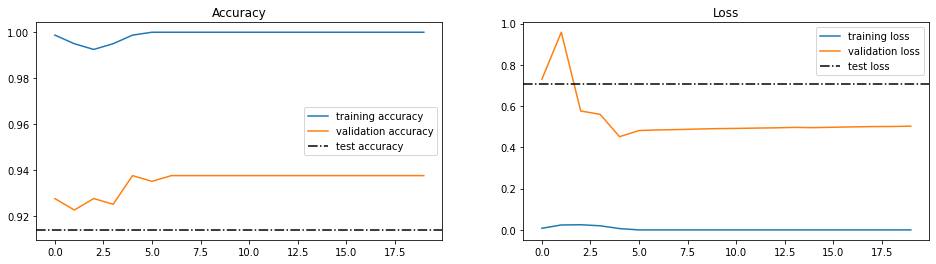

In [ ]:
#Gráficos 
plt.subplot(1,2,1)
plt.title("Accuracy")
plt.plot(history.history["acc"],label="training accuracy")
plt.plot(history.history["val_acc"],label="validation accuracy")
plt.axhline(y=acc_tst[1],color="k",linestyle="-.",label="test accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.title("Loss")
plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.axhline(y=acc_tst[0],color="k",linestyle="-.",label="test loss")
plt.legend()

plt.show()

**Comentarios**

En una primera instancia, se decidió que la primera capa Dense tuviera 44 neuronas ya que era una cantidad que estaba entre 64 y 24 neuronas, pero al tener un peor desempeño que con la primera estructura se decidió cambiar a 48, ya que es un múltiplo de 24 se pensó que esto podría mejorar el desempeño, lo cual ocurrió y se obtuvo la mayor accuracy en el conjunto de test luego de reentrenarla, esto fue de 0.91. Sin embargo, en el primer entrenamiento tuvo un desempeño peor que en la primera estructura.

Los valores de perdida en los distintos conjuntos también es mejor luego del reentrenamiento, en la primera estructura este valor es incluso mayor que 1 para el conjunto de test.

## 2.f Exploración de profundidad

Por comodidad preferiremos quedarnos con la estructura en bloques del item anterior. En esta pregunta deberán explorar qué ocurre a medida uno cambia la profundidad de la red. Para esto, entrene redes con distintos números de bloques. Debe a lo menos entrenar una red por cada número de bloques entre 1 y 5 bloques (**¿Qué particularidad tiene la red con 5 bloques? ¿Puede entrenar una más profunda?**). También entrenar una red con "0" bloques, es decir una red densa como las de la pregunta 1. 

Comente sobre los casos extremos (0 bloques y 5 bloques), ya sea a partir de lo aprendido en clases o lo que observa al momento de entrenar las redes. **¿Le parece que alguno de los dos sea buena aproximación para reconocimiento de imágenes?** Para cada red recupere `history` y grafique el valor del mejor _accuracy_ en validación y el _accuracy_ sobre entrenamiento en el mismo _epoch_ en función de la profundidad de la red, similar al procedimiento realizado en 1.c.

Quedan a su discreción los parámetros de cada capa convolucional, puede utilizar el número de filtros que estime convenientes, utilice _stride_ por default, y en caso de utilizar alguna regla para el número de filtros, que tal regla sea la misma para todas las profundidades (pueden ver dos posibles ejemplos en el código propuesto abajo). Para las capas de _MaxPool_ utilicen las que aparecen en el código.

Para ahorrar tiempo, si observa que una red no converge, puede detener anticipadamente el entrenamiento. Para esto es recomendable usar el _Callback_ de keras `EarlyStopping` el cual deben agregar al momento de utilizar el método `.fit` (ejemplo similar en pregunta 1 y pregunta 2.d), sin embargo asegúrese de ponerle _patience_ de a lo menos 10, pues como podrá observar algunas redes empeoran su desempeño en algunas _epochs_ para luego seguir mejorando. Puede elegir monitorear la métrica que estime conveniente para esta pregunta. 


In [ ]:
histories = []
acc_tsts = []

for block_num in range(5): 

  # create model
  model = Sequential()
  for i in range(block_num):
    #model.add(Conv2D(int(128/(i+2)), (3,3),padding='same',activation='relu'))
    #model.add(Conv2D(int(128/(i+2)), (3,3), padding='same', activation='relu'))
    model.add(Conv2D(int(128/(i+2)), (3,3), padding='same',activation='relu', input_shape=x_tr.shape[1:]))
    model.add(Conv2D(int(128/(i+2)), (3,3), padding='same', activation='relu', input_shape=x_tr.shape[1:]))
    model.add(MaxPooling2D(pool_size=(2, 2)))

  # flatten
  model.add(Flatten())   

  # dense's
  model.add(Dense(units=48, activation='relu'))  
  model.add(Dense(units=24, activation='softmax')) 

  # compile
  my_callbacks = [History(), EarlyStopping(patience=10,monitor="val_loss", restore_best_weights=True)]
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

  # train and save results
  history = model.fit(x_tr, y_tr, epochs=10, validation_data=(x_val,y_val),verbose=0,callbacks=my_callbacks)
  acc_tst = model.evaluate(x_tst, y_tst, verbose=0)
  histories.append(history)
  acc_tsts.append(acc_tst)

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 42)        24234     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 42)        15918     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 42)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 7, 7, 32)         

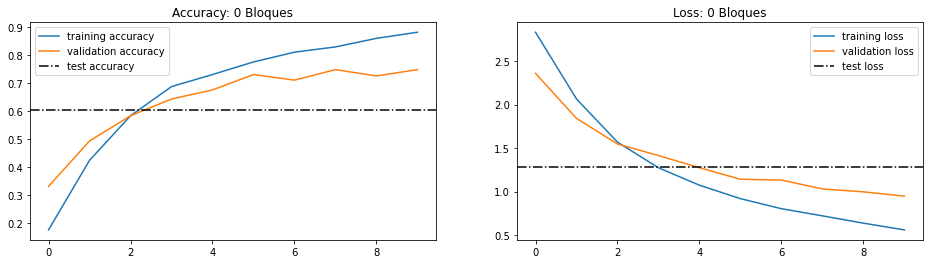

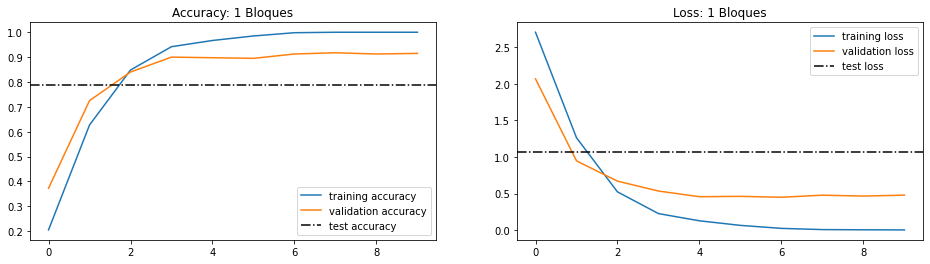

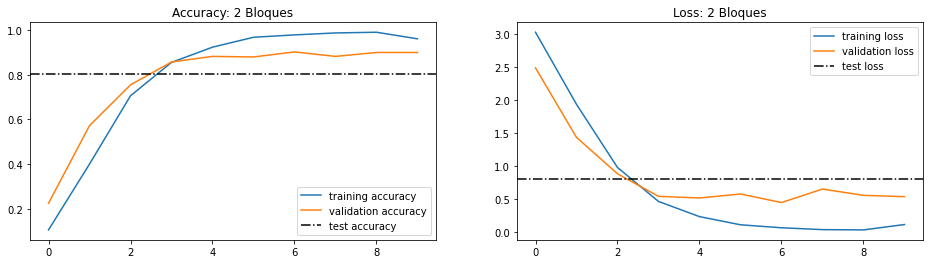

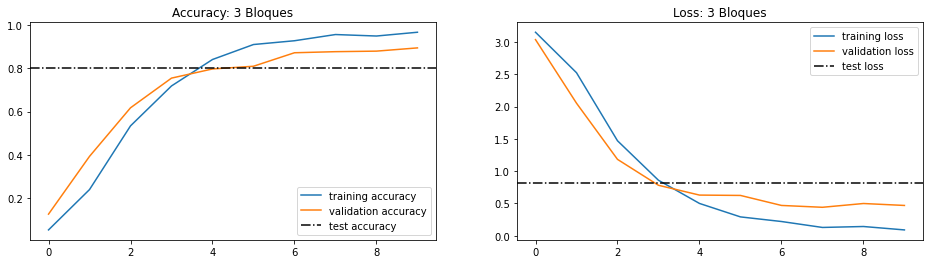

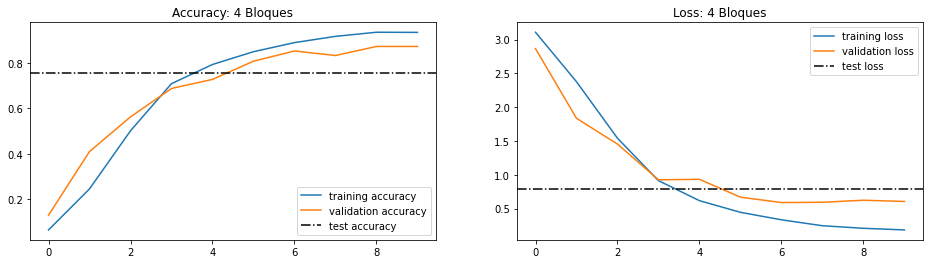

In [ ]:
#Gráficos 
for i in range(5):
  plt.subplot(1,2,1)
  plt.title("Accuracy: " + str(i) + " Bloques" )
  plt.plot(histories[i].history["acc"],label="training accuracy")
  plt.plot(histories[i].history["val_acc"],label="validation accuracy")
  plt.axhline(y=acc_tsts[i][1],color="k",linestyle="-.",label="test accuracy")
  plt.legend()

  plt.subplot(1,2,2)
  plt.title("Loss: " + str(i) + " Bloques")
  plt.plot(histories[i].history["loss"],label="training loss")
  plt.plot(histories[i].history["val_loss"],label="validation loss")
  plt.axhline(y=acc_tsts[i][0],color="k",linestyle="-.",label="test loss")
  plt.legend()

  plt.show()

**Respuestas**

La particularidad que tiene la red de 4 bloques es que reduce la dimensionalidad a (1,1), esto quiere decir que no se puede entrenar una red más profunda ya que entregaría una dimensión negativa, lo cual no puede ocurrir. 

Ninguno parece ser una buena aproximación, ya que con 1 a 3 bloques se logra un mayor accuracy que con 0 o 4 bloques. Esto permite notar que no por agregar más capas se va a obtener un mejor resultado, es necesario experimentar y reconocer cuantas capas son suficientes y en este caso 2 o 3 bloques son suficientes para tener un buen modelo.

## 2.g Exploración libre

Como probablemente ya habrán notado, la cantidad de hiperparámetros que se pueden fijar y explorar en una red convolucional es enorme. A parte de poder modificar la arquitectura de la red y su tamaño o profundidad, pueden en cada una de las capas modificar el número de filtros, el tamaño de los filtros; modificar _stride_, cambiar las activaciones, cambiar el _padding_, cambiar los tamaños de los _MaxPool_ o sus _strides_ o incluso modificar las capas densas al final de la red. 

Por motivos de tiempo y con la esperanza de que la tarea no sea más tediosa de lo necesario, en vez de pedir explorar cada uno de estos parámetros, se les propone elegir una exploración de la siguiente lista. Debe realizar la exploración exahustivamente, comentar sus resultados apoyándose de gráficos y su conocimiento teórico cuando sea apropiado. Independiente de la exploración elegida debe responder las preguntas finales. 

Para todas las exploraciones utilice como _template_ la mejor red entrenada hasta ahora y modifique el parámetro relevante. Si utiliza otra red, justifique brévemente su elección. 

**Exploraciones posibles (Elija 1)**
* Tamaño de los filtros: Manteniendo el filtro cuadrado, explore cambiar el tamaño de filtro de alguna(s) capas convolucionales. Debe explorar a lo menos valores de $1\times 1$ hasta $9\times 9$, por lo cual debe asegurarse realizar la exploración en una capa donde las dimensiones de los filtros de la capa anterior (o el Input de la capa) se lo permita. 
* Exploración del número de filtros: Explore variando el número de filtros de alguna(s) capas. Se recomienda explorar en potencias de 2, y debe explorar a lo menos 10 valores distintos.
* Neuronas capa Densa: realice una exploración del número de neuronas de alguna o ambas de las capas densas. Debe explorar a lo menos 10 combinaciones distintas. Puede dejar una de las dos capas fijas y variar la otra siguiendo potencias de 2 por ejemplo. Tenga cuidado con la explosión del número de parámetros. 
* Pooling: Pruebe cambiar el tamaño de los _MaxPool_ entre $2\times 2$ a $6\times 6$. Pruebe también cambiando todas las capas por `AveragePooling2D`, realizando la misma exploración que con _MaxPool_.
* Pooling "convolucional": Una aproximación posible para reemplazar las capas de _maxpool_ es utilizando capas convolucionales con kernel $2\times 2$ y _stride_ $2\times 2$. Pruebe reemplazando las capas _maxpool_ por este tipo de capas, luego pruebe una mezcla de ambas, luego pruebe simplemente eliminando las capas de _pooling_ y agregandole _stride_ a la segunda capa de cada bloque (con _kernel size_ $2\times 2$ y $3 \times 3$). Pruebe finalmente cambiando las funciones de activación de las capas donde se realiza la disminución de dimensión, probando a lo menos activación lineal, sigmoidea y tangente hiperbólica.

**Preguntas (responder todas)**:
* ¿A que equivaldría utilizar tamaño de kernel $1 \times 1$?
* ¿Por qué si cambiamos el número de filtros de una capa también modificamos el número de parámetros de la siguiente capa?
* ¿En su opinión, qué metodo resume mejor la información de una capa, _maxpool_ o _averagepool_?
* ¿Qué tipo de patrones esperaría usted que se extraigan mejor con un kernel no cuadrado (por ejemplo $3\times 2$)? Apoyese de un ejemplo pequeño o una explique el fenómeno llevandolo al "extremo" (e.g. $1\times 3$)

La mejor red entrenada hasta ahora fue la estructura anterior con 3 bloques, si bien antes se había conseguido un resultado bueno, esto fue luego del reentrenamiento.  Se escogió explorar el *pooling* y por esta razón, se decidió utilizar solo 1 bloque debido a que al aumentar el pooling size, la dimensionalidad se iba a reducir y volver negativa rápidamente si se utilizaban muchas capas de Pooling, por lo que se define la siguiente estructura:

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense

def train_network_2_g(pooling):
  histories = []
  acc_tsts = []
  for i in range(2, 7):
    # create model
    model = Sequential()
    # C x C x P
    model.add(Conv2D(128, (3,3), padding='same',activation='relu', input_shape=x_tr.shape[1:]))
    model.add(Conv2D(128, (3,3), padding='same', activation='relu', input_shape=x_tr.shape[1:]))
    model.add(pooling(pool_size=(i, i)))

    # flatten
    model.add(Flatten())   

    # dense's
    model.add(Dense(units=48, activation='relu'))  
    model.add(Dense(units=24, activation='softmax')) 

    # compile
    my_callbacks = [History(), EarlyStopping(patience=10,monitor="val_loss", restore_best_weights=True)]
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

    # train and save results
    history = model.fit(x_tr, y_tr, epochs=10, validation_data=(x_val,y_val),verbose=0,callbacks=my_callbacks)
    acc_tst = model.evaluate(x_tst, y_tst, verbose=0)
    histories.append(history)
    acc_tsts.append(acc_tst)

  return histories, acc_tsts

In [ ]:
results_max = train_network_2_g(MaxPooling2D)
results_avg = train_network_2_g(AveragePooling2D)

Se graficará primero el accuracy y luego el loss.

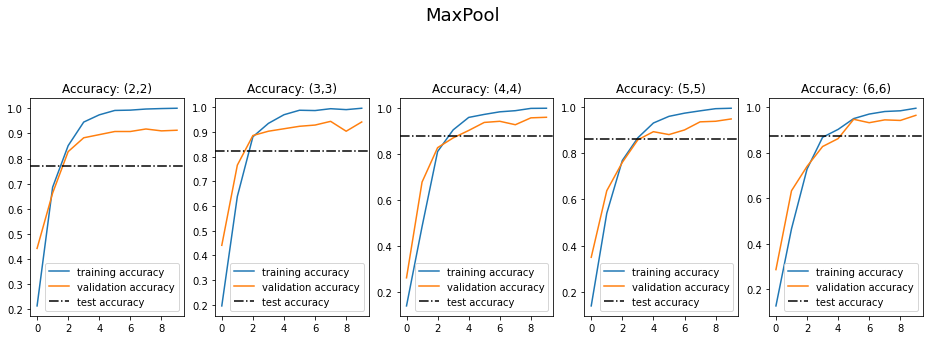

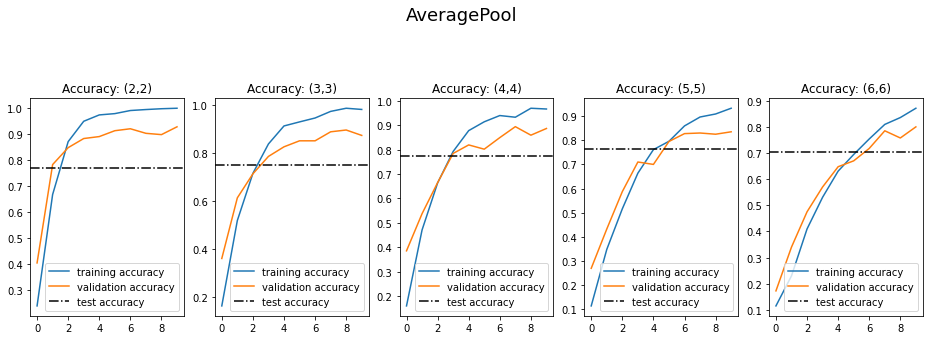

In [ ]:
#Gráficos 
plt.suptitle('MaxPool',size=18,y=1.2)
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.title("Accuracy: (" + str(i+2) + ","+ str(i+2)+")")
  plt.plot(results_max[0][i].history["acc"],label="training accuracy")
  plt.plot(results_max[0][i].history["val_acc"],label="validation accuracy")
  plt.axhline(y=results_max[1][i][1],color="k",linestyle="-.",label="test accuracy")
  plt.legend()
plt.show()

plt.suptitle('AveragePool',size=18,y=1.2)
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.title("Accuracy: (" + str(i+2) + ","+ str(i+2)+")")
  plt.plot(results_avg[0][i].history["acc"],label="training accuracy")
  plt.plot(results_avg[0][i].history["val_acc"],label="validation accuracy")
  plt.axhline(y=results_avg[1][i][1],color="k",linestyle="-.",label="test accuracy")
  plt.legend()
plt.show()

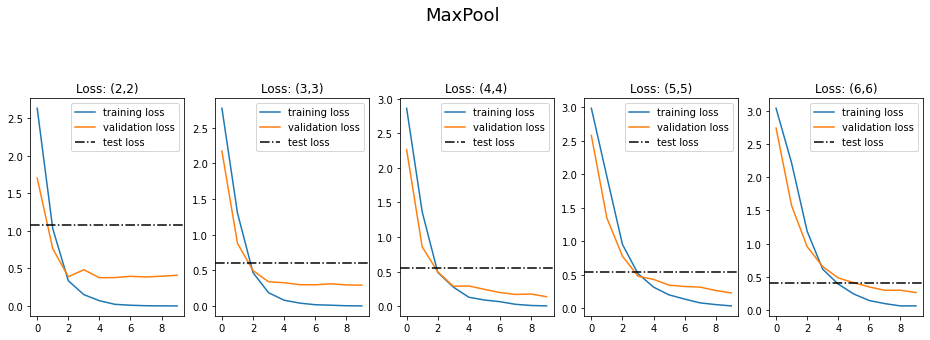

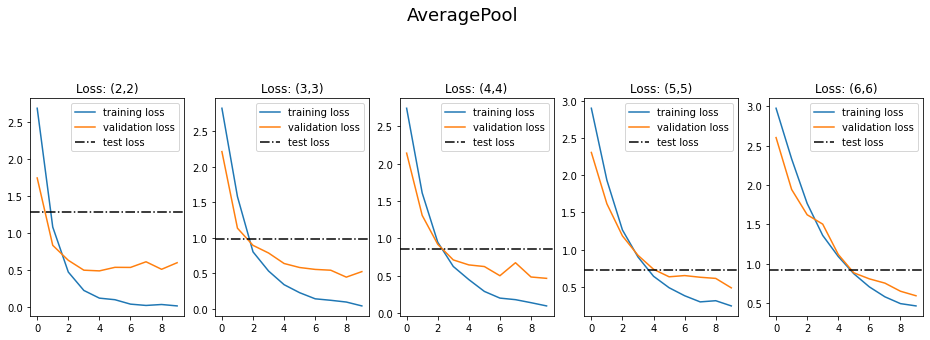

In [ ]:
#Gráficos 
plt.suptitle('MaxPool',size=18,y=1.2)
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.title("Loss: (" + str(i+2) + ","+ str(i+2)+")")
  plt.plot(results_max[0][i].history["loss"],label="training loss")
  plt.plot(results_max[0][i].history["val_loss"],label="validation loss")
  plt.axhline(y=results_max[1][i][0],color="k",linestyle="-.",label="test loss")
  plt.legend()

plt.show()

plt.suptitle('AveragePool',size=18,y=1.2)
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.title("Loss: (" + str(i+2) + ","+ str(i+2)+")")
  plt.plot(results_avg[0][i].history["loss"],label="training loss")
  plt.plot(results_avg[0][i].history["val_loss"],label="validation loss")
  plt.axhline(y=results_avg[1][i][0],color="k",linestyle="-.",label="test loss")
  plt.legend()
plt.show()

**Respuestas**

Utilizar un kernel de tamaño $1 \times 1$ es equivalente a una capa cross channel parametric pooling.

El número de filtros es la dimensionalidad del espacio de salida, por lo que si se cambia, también se modifica el número de parámetros de la capa siguiente.

El método que mejor resume la información de una capa es MaxPool, ya que en todos los casos (distintos tamaños de pool) tiene mejor accuracy que AveragePool, esto puede deberse a que AveragePool saca el promedio del Kernel, y este valor no necesariamente representa algún patrón.

Se espera que los patrones que se extraigan mejor sean lo que no son cuadrados, por ejemplo, en el caso de las imágenes los dedos estirados que tiene una forma más rectangular deberían ser mejor identificador con un kernel de este tamaño.

**Comentarios**

Se puede observar en los gráficos que MaxPool tiene mejor desempeño de AveragePool, esto debido al mayor accuracy que tiene la primera. 

Además, en este caso mientras mayor es el tamaño de pool, mejor es el desempeño, esto no quiere decir que se va a aumentar demasiado ya que la imagen se ve reducida significativamente, llegando incluso a tener dimensión negativa, también se debe considerar que si se captura solo unos pocos máximos, no se estaría procesando toda la información de los patrones, solo una cantidad reducida.

## 2.h Data Augmentation

Otra manera de evitar sobreajuste y mejorar los desempeños de una red convolucionar es usar aumentación de datos (Ignore el hecho de que botamos datos al inicio). La idea detrás de este método es un hecho muy simple: si rotamos ligeramente una foto por ejemplo de un caballo, seguirá siendo de un caballo. Lo mismo si la movemos ligeramente hacia algun lado, hacia arriba, _etc_.

Keras trae implementado un generador de imagenes aumentadas, puede basarse en el código abajo para utilizarlo, aunque si lo desea o estima conveniente puede cambiar alguno de los parámetros. Entrene a completitud la mejor red que obtuvo a lo largo de toda la tarea.

**Pregunta:** 

¿Qué tanto mejora el desempeño de la red utilizando aumentación de datos? 

Basándose en el abecedario de lenguaje de señas que disponemos, ¿Cree que resultará beneficioso o contraproducente realizar _flips_ horizontales y/o verticales?

In [ ]:
model = Sequential()

#Primera capa C x C x P
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Segunda capa C x C x P 
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Capa flatten y D's
model.add(Flatten())   
model.add(Dense(units=48, activation='relu'))  
model.add(Dense(units=24, activation='softmax')) # output


my_callbacks = [History(), EarlyStopping(patience=100,monitor="val_loss", restore_best_weights=True)]
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(x_tr, y_tr, epochs=20, validation_data=(x_val,y_val),verbose=0,callbacks=my_callbacks)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_tr)

history = model.fit_generator(datagen.flow(x_tr, y_tr, batch_size=32),
                    epochs=50,
                    verbose=2,
                    callbacks=[EarlyStopping(patience=5)],
                    validation_data=(x_val,y_val),
                    validation_freq=1,
                    shuffle=True)

Epoch 1/50
50/50 - 1s - loss: 0.0626 - acc: 0.9775 - val_loss: 0.0560 - val_acc: 0.9875
Epoch 2/50
50/50 - 1s - loss: 0.0602 - acc: 0.9806 - val_loss: 0.0599 - val_acc: 0.9900
Epoch 3/50
50/50 - 1s - loss: 0.0578 - acc: 0.9844 - val_loss: 0.0195 - val_acc: 0.9925
Epoch 4/50
50/50 - 1s - loss: 0.0374 - acc: 0.9900 - val_loss: 0.0549 - val_acc: 0.9900
Epoch 5/50
50/50 - 1s - loss: 0.0239 - acc: 0.9931 - val_loss: 0.0733 - val_acc: 0.9900
Epoch 6/50
50/50 - 1s - loss: 0.0512 - acc: 0.9856 - val_loss: 0.0735 - val_acc: 0.9925
Epoch 7/50
50/50 - 1s - loss: 0.0419 - acc: 0.9844 - val_loss: 0.1083 - val_acc: 0.9775
Epoch 8/50
50/50 - 1s - loss: 0.0475 - acc: 0.9837 - val_loss: 0.0706 - val_acc: 0.9925


**Respuestas**

Mejora demasiado el desempeño, ya que antes a lo más se tenía 0.91 de accuracy, mientras que con esta técnica mejoró a 0.98, lo cual es bastante para las CNNs sin agregar más datos en el entrenamiento.

Se cambió a True el flip horizontal y/ vertical y ninguna combinación tuvo mejor desempeño que cuando las dos opciones estaban en False, esto puede deberse a que la letra que se representa es sensible a cualquier movimiento, por ejemplo, si a una letra se le hace flip, sobretodo horizontal puede representar algo completamente distinto y confundirse con otra letra, por otro lado, un flip vertical no arruina tanto el accuracy.

## 2.i Matriz de Confusión

Si bien el _accuracy_ nos ha acompañado toda la pregunta para evaluar el desempeño de nuestras redes de forma fácilmente interpretable, no considera por ejemplo si una gran parte de los errores provienen de una sola clase, o si alguna clase se logra clasificar perfectamente. Una manera de visualizar fácilmente esta métrica más granular, es utilizando la matriz de confusión. Investigue y explique brévemente en qué consiste una matriz de confusión (puede explicar el caso binario donde solo hay dos clases).


Luego, apoyándose en los códigos de abajo, visualizaremos la matriz de confusión del modelo que mejor se desempeñó a lo largo de toda la tarea. 

- ¿Algo le llama la atención? 
- ¿Qué clases se confunden más entre si?
- ¿Coincidió esto con sus predicciones al inicio de la tarea? 

Igual de la misma forma que en 2.a, visualice algunas imágenes mal clasificadas por su modelo. 
- ¿Le parece razonable que el modelo no las clasifique bien?

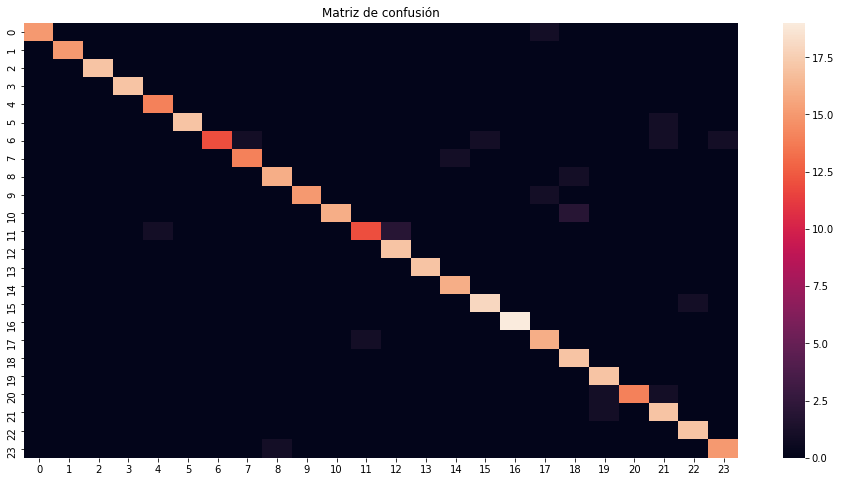

In [ ]:
from sklearn.metrics import confusion_matrix
# Puede usar libreria seaborn para realizar facilmente heatmaps anotados: 
import seaborn as sns
plt.rcParams["figure.figsize"]=[16,8]

# Modelo y entrenamiento
model = Sequential()

#Primera capa C x C x P
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Segunda capa C x C x P 
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Capa flatten y D's
model.add(Flatten())   
model.add(Dense(units=48, activation='relu'))  
model.add(Dense(units=24, activation='softmax')) # output


my_callbacks = [History(), EarlyStopping(patience=100,monitor="val_loss", restore_best_weights=True)]
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(x_tr, y_tr, epochs=20, validation_data=(x_val,y_val),verbose=0,callbacks=my_callbacks)
# Predecimos y lo transformamos a letras
y_pred=np.argmax(model(x_val), axis=1)
y = np.argmax(y_val, axis=1)
# Matriz de confusión
sns.heatmap( confusion_matrix(y, y_pred))
plt.title("Matriz de confusión")
plt.show()

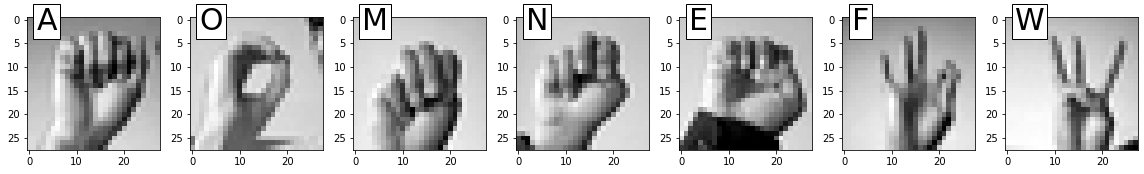

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[16,4]

plt.title("A-O")
plt.subplot(1,7,1)
plt.imshow(x_tmp[np.where(y_tmp[:,0]==0)[0][0],:,:,0], cmap = "gray")  
plt.text(1.5, 2.2, "A", bbox={'facecolor': 'white', 'pad': 3},fontsize=30)
plt.subplot(1,7,2)
plt.imshow(x_tmp[np.where(y_tmp[:,0]==14)[0][0],:,:,0], cmap = "gray")  
plt.text(1.5, 2.2, "O", bbox={'facecolor': 'white', 'pad': 3},fontsize=30)
plt.subplot(1,7,3)
plt.imshow(x_tmp[np.where(y_tmp[:,0]==12)[0][0],:,:,0], cmap = "gray")  
plt.text(1.5, 2.2, "M", bbox={'facecolor': 'white', 'pad': 3},fontsize=30)
plt.subplot(1,7,4)
plt.imshow(x_tmp[np.where(y_tmp[:,0]==13)[0][0],:,:,0], cmap = "gray")  
plt.text(1.5, 2.2, "N", bbox={'facecolor': 'white', 'pad': 3},fontsize=30)
plt.subplot(1,7,5)
plt.imshow(x_tmp[np.where(y_tmp[:,0]==4)[0][0],:,:,0], cmap = "gray")  
plt.text(1.5, 2.2, "E", bbox={'facecolor': 'white', 'pad': 3},fontsize=30)
plt.subplot(1,7,6)
plt.imshow(x_tmp[np.where(y_tmp[:,0]==5)[0][0],:,:,0], cmap = "gray")  
plt.text(1.5, 2.2, "F", bbox={'facecolor': 'white', 'pad': 3},fontsize=30)
plt.subplot(1,7,7)
plt.imshow(x_tmp[np.where(y_tmp[:,0]==22)[0][0],:,:,0], cmap = "gray")  
plt.text(1.5, 2.2, "W", bbox={'facecolor': 'white', 'pad': 3},fontsize=30)
plt.tight_layout()
plt.show()


**Matriz de confusión**

Es una herramienta que permite visualizar el desempeño de la clasificación. Las columnas representan el número de predicciones de cada clase, y las filas de la matriz indican las instancias de la clase real.

**Respuestas**

Lo que llama la atención de los resultados es que la letra A es confundida con la letra O en al menos 2 ocasiones, ya que se letras bastante distintas, y de todas las letras con las que la A puede ser mal clasificada, en ningún caso ocurrió.

Las clases que se confunden más entre sí, son los siguientes conjuntos: A-O, M-N-E, F-W. La mayoría de estos conjuntos no fueron mencionados en el 2.a ya que no se pensó que podrían ser mal clasificados. 

Si en el caso de E-M-N, ya que las letras son bastante parecidas entre sí. Sin embargo, en las demás no se parecen mucho, solo algunas partes como 3 dedos levantados, pero lo demás es muy distinto, aunque el modelo no comete error demasiados errores.

## 2.j Batch Normalization
Una manera propuesta de mejorar los desempeños de las redes en general, que funciona bastante bien en tareas de reconocimiento de imagenes es _Batch Normalization_. Entrene nuevamente su red preferida de la pregunta anterior, agregando capas de _Batch Normalization_ luego de cada capa de _MaxPool_. Comente sus resultados. 

**Preguntas**

Segun su conocimiento teórico y investigación, ¿Qué realiza _Batch Normalization_ en términos matemáticos? En términos de aprendizaje, ¿qué evita la utilización de _Batch Normalization_?

¿Mejoran los desempeños de la red agregando _Batch Normalization_? ¿Existe diferencias entre una capa de _batch normalization_ justo antes o justo despues de una capa de _MaxPool_ en términos numéricos? ¿Opina lo mismo en términos de aprendizaje? Discuta. 

Accuracy en el conjunto de test:  0.9164807796478271


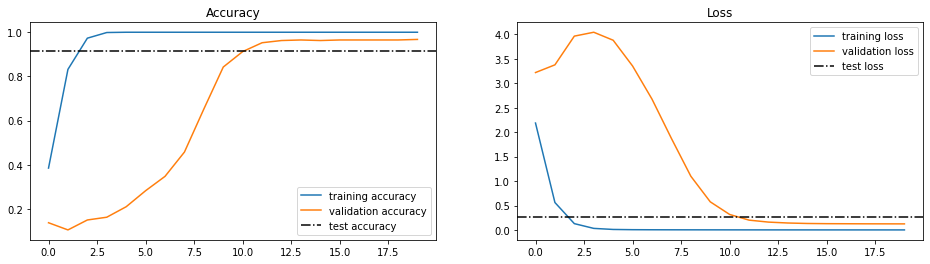

In [ ]:
from keras.layers.normalization import BatchNormalization

# Modelo y entrenamiento
model = Sequential()

#Primera capa C x C x P x B
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

#Segunda capa C x C x P x B
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

#Capa flatten y D's
model.add(Flatten())   
model.add(Dense(units=48, activation='relu'))  
model.add(Dense(units=24, activation='softmax')) # output


my_callbacks = [History(), EarlyStopping(patience=100,monitor="val_loss", restore_best_weights=True)]
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(x_tr, y_tr, epochs=20, validation_data=(x_val,y_val),verbose=0,callbacks=my_callbacks)

# Accuracy
acc_tst = model.evaluate(x_tst, y_tst, verbose=0)
print("Accuracy en el conjunto de test: ", acc_tst[1])

#Gráficos   
plt.subplot(1,2,1)
plt.title("Accuracy")
plt.plot(history.history["acc"],label="training accuracy")
plt.plot(history.history["val_acc"],label="validation accuracy")
plt.axhline(y=acc_tst[1],color="k",linestyle="-.",label="test accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.title("Loss")
plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.axhline(y=acc_tst[0],color="k",linestyle="-.",label="test loss")
plt.legend()

plt.show()

**Respuestas**

En términos matemáticos el Batch Normalization, normaliza la salida de la capa previa incluyendo un pequeño epsilon para estabilidad numérica, esto es:

$\hat x_i = \dfrac{x_i - \mu_b}{\sqrt{\sigma^2_B + \epsilon} }$

En términos de aprendizaje, Batch normalization evita el overfitting ya que al regularse evita que pequeños cambios en el comienzo de la red se propaguen y amplifiquen en el resto de la red, teniendo así modelos más confiables.

La red mejora ligeramente el desempeño esto puede deberse a que no es una capa muy profunda, se hizo la prueba agregando una capa más de profundidad y el resultado mejoró más paso a 0.93 de accuracy, sin embargo, mantuvimos la arquitectura favorita que elegimos a lo largo de la tarea.

Si existen diferencias entre una capa de batch normalization justo antes o justo después de una capa de Maxpool, ya que batch normalization como su nombre indica normaliza la entrada que se le entrega, por lo tanto, normalizar la imagen y luego obtener los máximos tendrá un resultado distinto que obtener los máximos y normalizarlos. Sin embargo, se realizaron pruebas y los resultados no variaron tanto, el accuracy no mejoró significativamente, y los gráficos tampoco cambiaron. Por lo que sí son diferentes, pero la diferencia no llega a ser significativa.